### Matplot lib
- it can plot base python data types, numpy arrays, pandas series and data frames

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

### Basic plotting

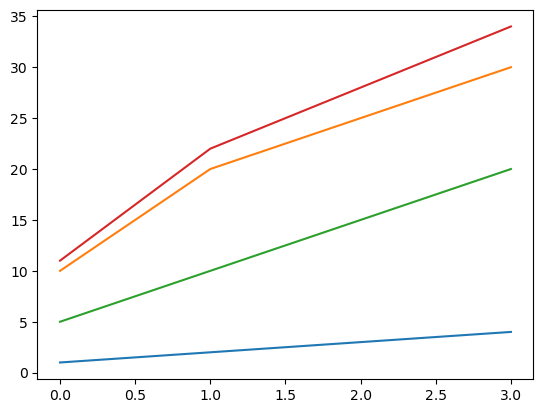

In [39]:
# plot function is used to plot the graph
# it by default plots a line chart
#plt.plot([1, 2, 3, 4])
# ploting a data frame
df = pd.DataFrame({
    'x': [1, 2, 3, 4],
    'y': [10, 20, 25, 30],
    'z': [5, 10, 15, 20]
}).assign(a = lambda x: x['x'] + x['y'])
# data frame index is being plotted on x-axis and the values for each column is being plotted on y-axis
#plt.plot(df)

# an explicit x-axis and y-axis can be provided
plt.plot([x for x in range(0,4)], df)

# show method is used to display the graph except in notebooks because it automatically displays the graph
plt.show()

In [95]:
# ploting data frames using object oriented approach
housing_df = pd.read_csv(
    '/Users/anand/learning/python/pylearn/notebooks/data/housing_data.csv', parse_dates=['period_begin', 'period_end'])
housing_df.columns

housing10 = housing_df.iloc[0:10]
housing_df

# fig, ax = plt.subplots()
# fig.suptitle('Total housing inventory')
# ax.plot(housing10['period_begin'], housing10['inventory'])

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,NaN,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325.0,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577.0,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22.0,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12.0,54.0,55.0,151.2,158062.5,38.300000
...,...,...,...,...,...,...,...,...,...
622334,"Washita County, OK",2019-11-25,2020-02-16,NaN,4.0,4.0,133.0,46650.0,NaN
622335,"Gray County, TX",2019-02-25,2019-05-19,NaN,1.0,1.0,180.5,62500.0,NaN
622336,"Custer County, OK",2020-02-24,2020-05-17,NaN,15.0,15.0,52.7,130120.8,NaN
622337,"Choctaw County, MS",2019-12-30,2020-03-22,NaN,2.0,3.0,46.0,115268.7,NaN


### Object oriented plotting

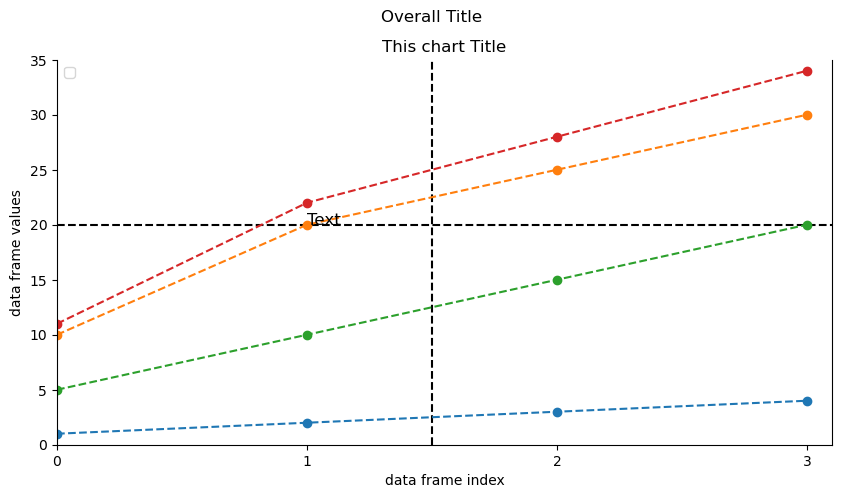

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Overall Title')
ax.set_title('This chart Title')
ax.set_xlabel('data frame index')
ax.set_ylabel('data frame values')
# pass bbox_to_anchor to set the position of the legend
ax.legend(['y', 'z', 'a'], loc='upper left')
ax.set_xlim(0, 3.1)
ax.set_ylim(0, 35)
ax.set_xticks([0, 1, 2, 3])
ax.text(1, 20, 'Text', fontsize=12)
# to draw a vertical line
ax.axvline(1.5, color='black', ls='--')
# to draw a horizontal line
ax.axhline(20, color='black', ls='--')
# to remove the top border
ax.spines['top'].set_visible(False)
ax.plot(df, ls='--', marker='o')

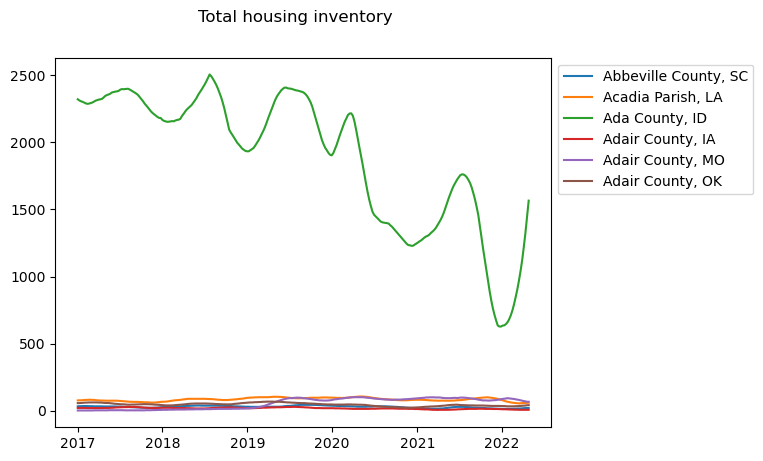

In [109]:
# stacked line charts
housing_regions_df = housing_df.groupby(['region_name','period_begin'], as_index=False).agg({'inventory': 'sum'})
housing_regions_df = housing_regions_df.query('region_name == "Abbeville County, SC"')

# do a stacked line chart for each region_name
legends = []
housing_regions_df = housing_df.groupby(['region_name','period_begin'], as_index=False).agg({'inventory': 'sum'})
fig, ax = plt.subplots()
fig.suptitle('Total housing inventory')
count = 0
for region_name, region_df in housing_regions_df.groupby('region_name'):
    legends.append(region_name)
    ax.plot(region_df['period_begin'], region_df['inventory'], label=region_name)
    count += 1
    if count > 5:
        break
ax.legend(legends, loc='upper left', bbox_to_anchor=(1, 1))

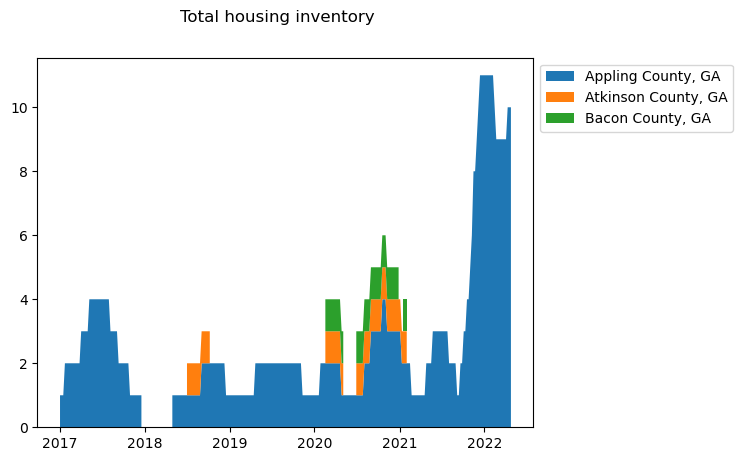

In [114]:
# create a pivot table and do a stacked line chart
housing_pivot = housing_df.pivot(
    index='period_begin', columns='region_name', values='inventory')
fig, ax = plt.subplots()
fig.suptitle('Total housing inventory')
ax.stackplot(housing_pivot.index, housing_pivot['Appling County, GA'], housing_pivot['Atkinson County, GA'], housing_pivot['Bacon County, GA'])
ax.legend(['Appling County, GA', 'Atkinson County, GA', 'Bacon County, GA'], loc='upper left', bbox_to_anchor=(1, 1))

In [138]:
# Dual axis chart
# using twinx() method to create dual axis charts
ca_housing = ( housing_df.loc[housing_df['region_name'].str.contains("CA")]
              .assign(region_name = housing_df['region_name'].str[0:-11])
              .set_index('period_begin').sort_index()
              )
ca_housing

,region_name,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
period_begin,,,,,,,,
2017-01-02,Mono,2017-03-26,97.0,153.0,161.0,89.7,450745.8,21.208631
2017-01-02,Yolo,2017-03-26,336.0,234.0,272.0,48.5,447859.2,9.857470
2017-01-02,Stanislaus,2017-03-26,1192.0,912.0,1043.0,55.3,300302.0,10.971331
2017-01-02,Shasta,2017-03-26,7.0,17.0,18.0,147.5,489020.8,17.333333
2017-01-02,Lassen,2017-03-26,2.0,5.0,5.0,98.8,198750.0,5.500000
...,...,...,...,...,...,...,...,...
2022-04-25,Calaveras,2022-07-17,150.0,171.0,185.0,42.4,530163.7,16.076746
2022-04-25,San Bernardino,2022-07-17,5866.0,4871.0,5435.0,30.9,522453.2,11.437381
2022-04-25,Butte,2022-07-17,626.0,457.0,513.0,33.1,457523.8,10.118276


### Dual Axis plots

Text(0, 0.5, 'Median Active List Price')

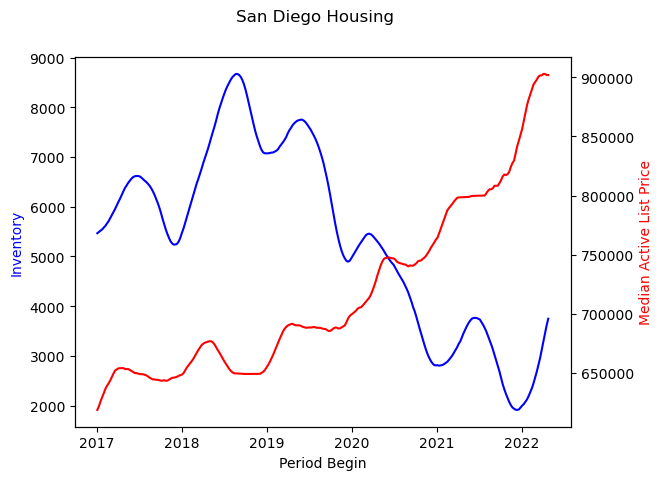

In [122]:
sd_dual = ca_housing.loc[ca_housing['region_name'] == 'San Diego', ['inventory', 'median_active_list_price']]

fig, ax = plt.subplots()
fig.suptitle('San Diego Housing')
ax.plot(sd_dual['inventory'], color='blue')
ax.set_ylabel('Inventory', color='blue')
ax.set_xlabel('Period Begin')
ax2 = ax.twinx()
ax2.plot(sd_dual['median_active_list_price'], color='red')
ax2.set_ylabel('Median Active List Price', color='red')

Text(0, 0.5, 'Median Active List Price')

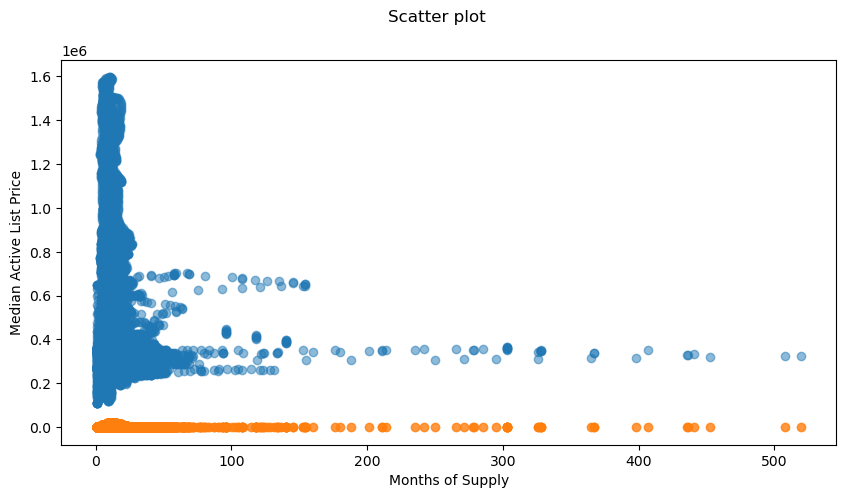

In [131]:
# scatter plot
# scatter plot is used to plot points on a graph
fig, ax = plt.subplots(figsize=(10, 5))
fig.suptitle('Scatter plot')
ax.scatter(ca_housing['months_of_supply'], ca_housing['median_active_list_price'], alpha=0.5)
ax.scatter(ca_housing['months_of_supply'],
           ca_housing['total_homes_sold'], alpha=0.8)
ax.set_xlabel('Months of Supply')
ax.set_ylabel('Median Active List Price')

### Subplots

In [146]:
# subplots lets you creater a grid of equal size plots in a single figure
# this would produce a 1x2 grid of plots with coordinates as (0,0) (0,1)
ca_housing = (
    housing_df
    .loc[(housing_df["region_name"].str.contains("CA"))]
    .assign(region_name=housing_df["region_name"].str[0:-11])
    .query("region_name in ['San Francisco', 'Los Angeles', 'San Diego', 'Tulare']")
)

ca_housing_pivot = (ca_housing
                    .pivot_table(
                        index="period_begin",
                        columns="region_name",
                        values="median_active_list_price"
                    )
                )

ca_housing_pivot.head(3)

# data prep for new subplot grid

price_by_region = (
    ca_housing.groupby("region_name")
    .agg({"median_active_list_price": "mean"})
)

price_by_month = (
    ca_housing
    .groupby(ca_housing["period_begin"].dt.month)
    .agg({"median_active_list_price": "mean"})
)

price_by_r_m = (
    ca_housing.groupby(
        ["region_name", ca_housing["period_begin"].dt.year, ca_housing["period_begin"].dt.month])
    .agg({"median_active_list_price": "mean"})
)

Text(0.5, 1.0, 'San Diego Vs. LA Prices')

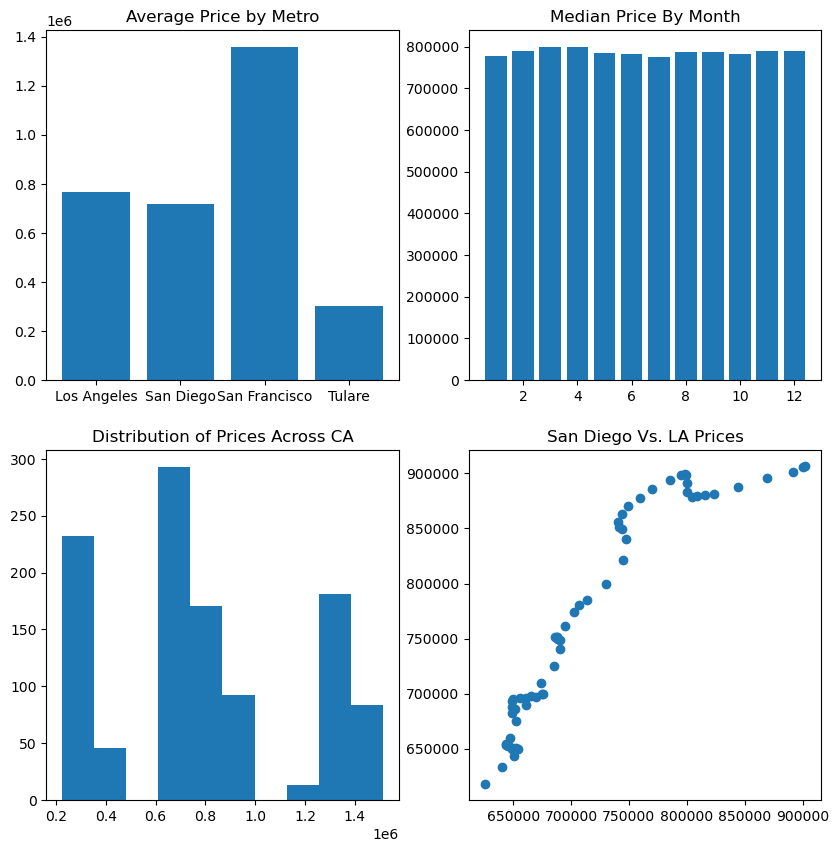

In [148]:
# Subplots can have mixed chart types

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0][0].bar(
    price_by_region.index,
    price_by_region["median_active_list_price"]
)
ax[0][0].set_title("Average Price by Metro")

ax[0][1].bar(
    price_by_month.index,
    price_by_month["median_active_list_price"]
)
ax[0][1].set_title("Median Price By Month")

ax[1][0].hist(ca_housing["median_active_list_price"])
ax[1][0].set_title("Distribution of Prices Across CA")


ax[1][1].scatter(
    price_by_r_m.loc["San Diego", "median_active_list_price"],
    price_by_r_m.loc["Los Angeles", "median_active_list_price"]
)
ax[1][1].set_title("San Diego Vs. LA Prices")

### GridSpec
- build layouts with charts of varying size by setting a gridspec object
- Creates a grid with specified number of rows and columns

In [150]:
import matplotlib.gridspec as gridspec

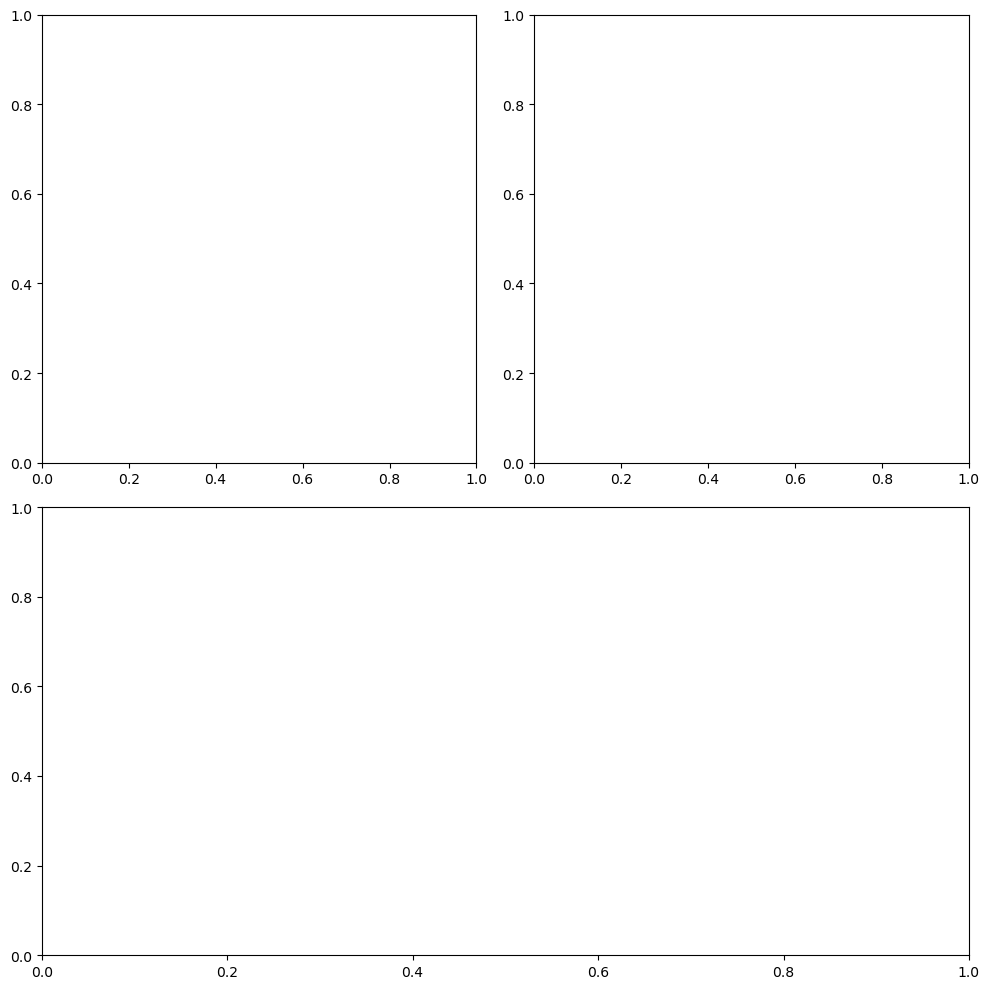

In [231]:
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(ncols=4, nrows=8)

ax1 = fig.add_subplot(gs[0:4, 0:2])
ax2 = fig.add_subplot(gs[0:4, 2:])
ax3 = fig.add_subplot(gs[4:, :])

fig.tight_layout()

In [161]:
# data prep to fill layout

LA_SF = (ca_housing
         .query("region_name in ['Los Angeles', 'San Francisco'] and period_begin.dt.year == 2020")
         .pivot_table(index="period_begin",
                      columns="region_name",
                      values=["total_homes_sold", "median_active_list_price"],
                      aggfunc="mean")
         )

two_year = LA_SF.resample("M").mean()
#print(two_year.head(3))

two_year_LA = (two_year.reset_index()
               .assign(year=lambda x: x.iloc[:, 0].dt.year,
                       month=lambda x: x.iloc[:, 0].dt.month)
               .iloc[:, [0, 3, 5, 6]]
               )

two_year_LA.columns = ["Date", "Homes Sold", "Year", "Month"]
#print(two_year_LA.head(3))

totals_jan = [LA_SF.iloc[0, 1], LA_SF.iloc[0, 0]]

totals_dec = [LA_SF.iloc[-1, 1], LA_SF.iloc[-1, 0]]

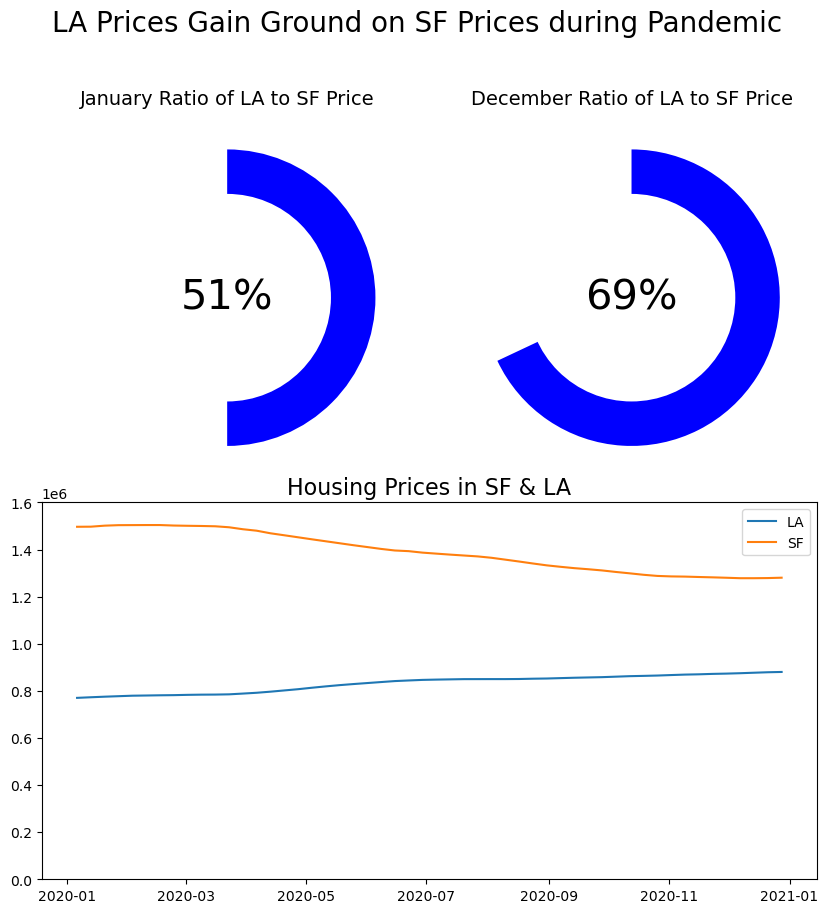

In [232]:

fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(ncols=4, nrows=8)

fig.suptitle("LA Prices Gain Ground on SF Prices during Pandemic", fontsize=20)

ax1 = fig.add_subplot(gs[0:4, 0:2])


ax1.pie([.5, .5],
        startangle=90,
        labels=["", ""],
        # autopct='%.0f%%',
        pctdistance=.85,
        colors=["White", "Blue"])

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.text(
    0, 0,
    f"{round((totals_jan[1] / totals_jan[0])*100)}%",
    ha='center',
    va='center',
    fontsize=30
)
ax1.set_title("January Ratio of LA to SF Price", fontsize=14)

ax2 = fig.add_subplot(gs[0:4, 2:])
ax2.pie(
    [.32, .68],
    startangle=90,
    labels=["", ""],
    pctdistance=.85,
    colors=["White", "Blue"]
)

hole = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(hole)
plt.text(
    0, 0,
    f"{round((totals_dec[1] / totals_dec[0]*100))}%",
    ha='center',
    va='center',
    fontsize=30
)

ax2.set_title("December Ratio of LA to SF Price", fontsize=14)

ax3 = fig.add_subplot(gs[4:, :])
ax3.plot(LA_SF.iloc[:, 0:2])
ax3.set_title("Housing Prices in SF & LA", fontsize=16)
ax3.set_ylim(0, 1600000)

ax3.legend(["LA", "SF"])